In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import plot_each as pe

from matplotlib import gridspec
from matplotlib.colors import LogNorm
from matplotlib.markers import MarkerStyle

In [2]:
### Common variables
# Names of panels
label_sum_list = ["(A)", "(B)", "(C)"]
label_list = ["(A-1)", "(A-2)", "(A-3)", "(A-4)", "(A-5)", "(B-1)", "(B-2)", "(B-3)", "(B-4)", "(B-5)", "(C-1)", "(C-2)", "(C-3)", "(C-4)", "(C-5)"]

In [3]:
### Functions to draw whole figure
# create grid specs
def create_gs():
    gs_list = []
    x_begin = 0.03 # left margin
    y_begin = 1 - 0.05 # top margin
    x_width = 0.26 # width of each panel
    y_width = 0.15 # height of each panel
    y_width1 = 0.12 # height of 1d dist
    y_width2 = 0.20 # height of 2d dist.
    x_inter = 0.05
    y_inter = 0.06
    y_inter1 = 0.04

    x = x_begin
    y = y_begin
    for i in range(3):
        for j in range(5):
            if j==4:
                gs = gridspec.GridSpec(5, 5, left=x, right= x + x_width, bottom = y-y_width2, top = y, wspace=0.05, hspace=0.05)
            elif j==2 or j==3:
                gs = gridspec.GridSpec(1, 1, left=x, right= x + x_width, bottom = y-y_width1, top = y)
                if j==3:
                    y -= y_width1 + y_inter1
                else:
                    y -= y_width1 + y_inter
            else:
                gs = gridspec.GridSpec(1, 1, left=x, right= x + x_width, bottom = y-y_width, top = y)
                y -= y_width + y_inter
            gs_list.append(gs)
        x += x_width + x_inter
        y = y_begin
    return gs_list

# draw figure
def draw_all(mode, xlim_list, ylim_list, file_list, savefilename):
    fig = plt.figure(figsize=(18, 20))

    # prepare grid specs
    gs_list = create_gs()

    # draw each panel
    fig_index = 0
    ylabel_list = [True, False, False]
    for i in range(3):
        param, t, R, b, f, index, sample_burn, MAP = pe.read_data(file_list[i])
        ylabel = ylabel_list[i]
        for j in range(5):
            gs = gs_list[fig_index]
            label = label_list[fig_index]
            label_sum = label_sum_list[i]
            if j==0:
                pe.plot_data(t, R, MAP, param, index, fig, gs, label, ylabel, label_sum, mode)
            elif j==1:
                pe.plot_free(b, f, index, param, fig, gs, label, ylabel, mode)
            elif j==2:
                pe.plot_K(sample_burn, index, param, MAP, fig, gs, label, ylabel, mode)
            elif j==3:
                pe.plot_gamma(sample_burn, index, param, MAP, fig, gs, label, ylabel, mode)
            elif j==4:
                xlim_range = xlim_list[i]
                ylim_range = ylim_list[i]
                pe.plot_2d(sample_burn, index, param, xlim_range, ylim_range, fig, gs, label, ylabel)
            fig_index += 1

    plt.savefig(savefilename, bbox_inches='tight')
    plt.show()

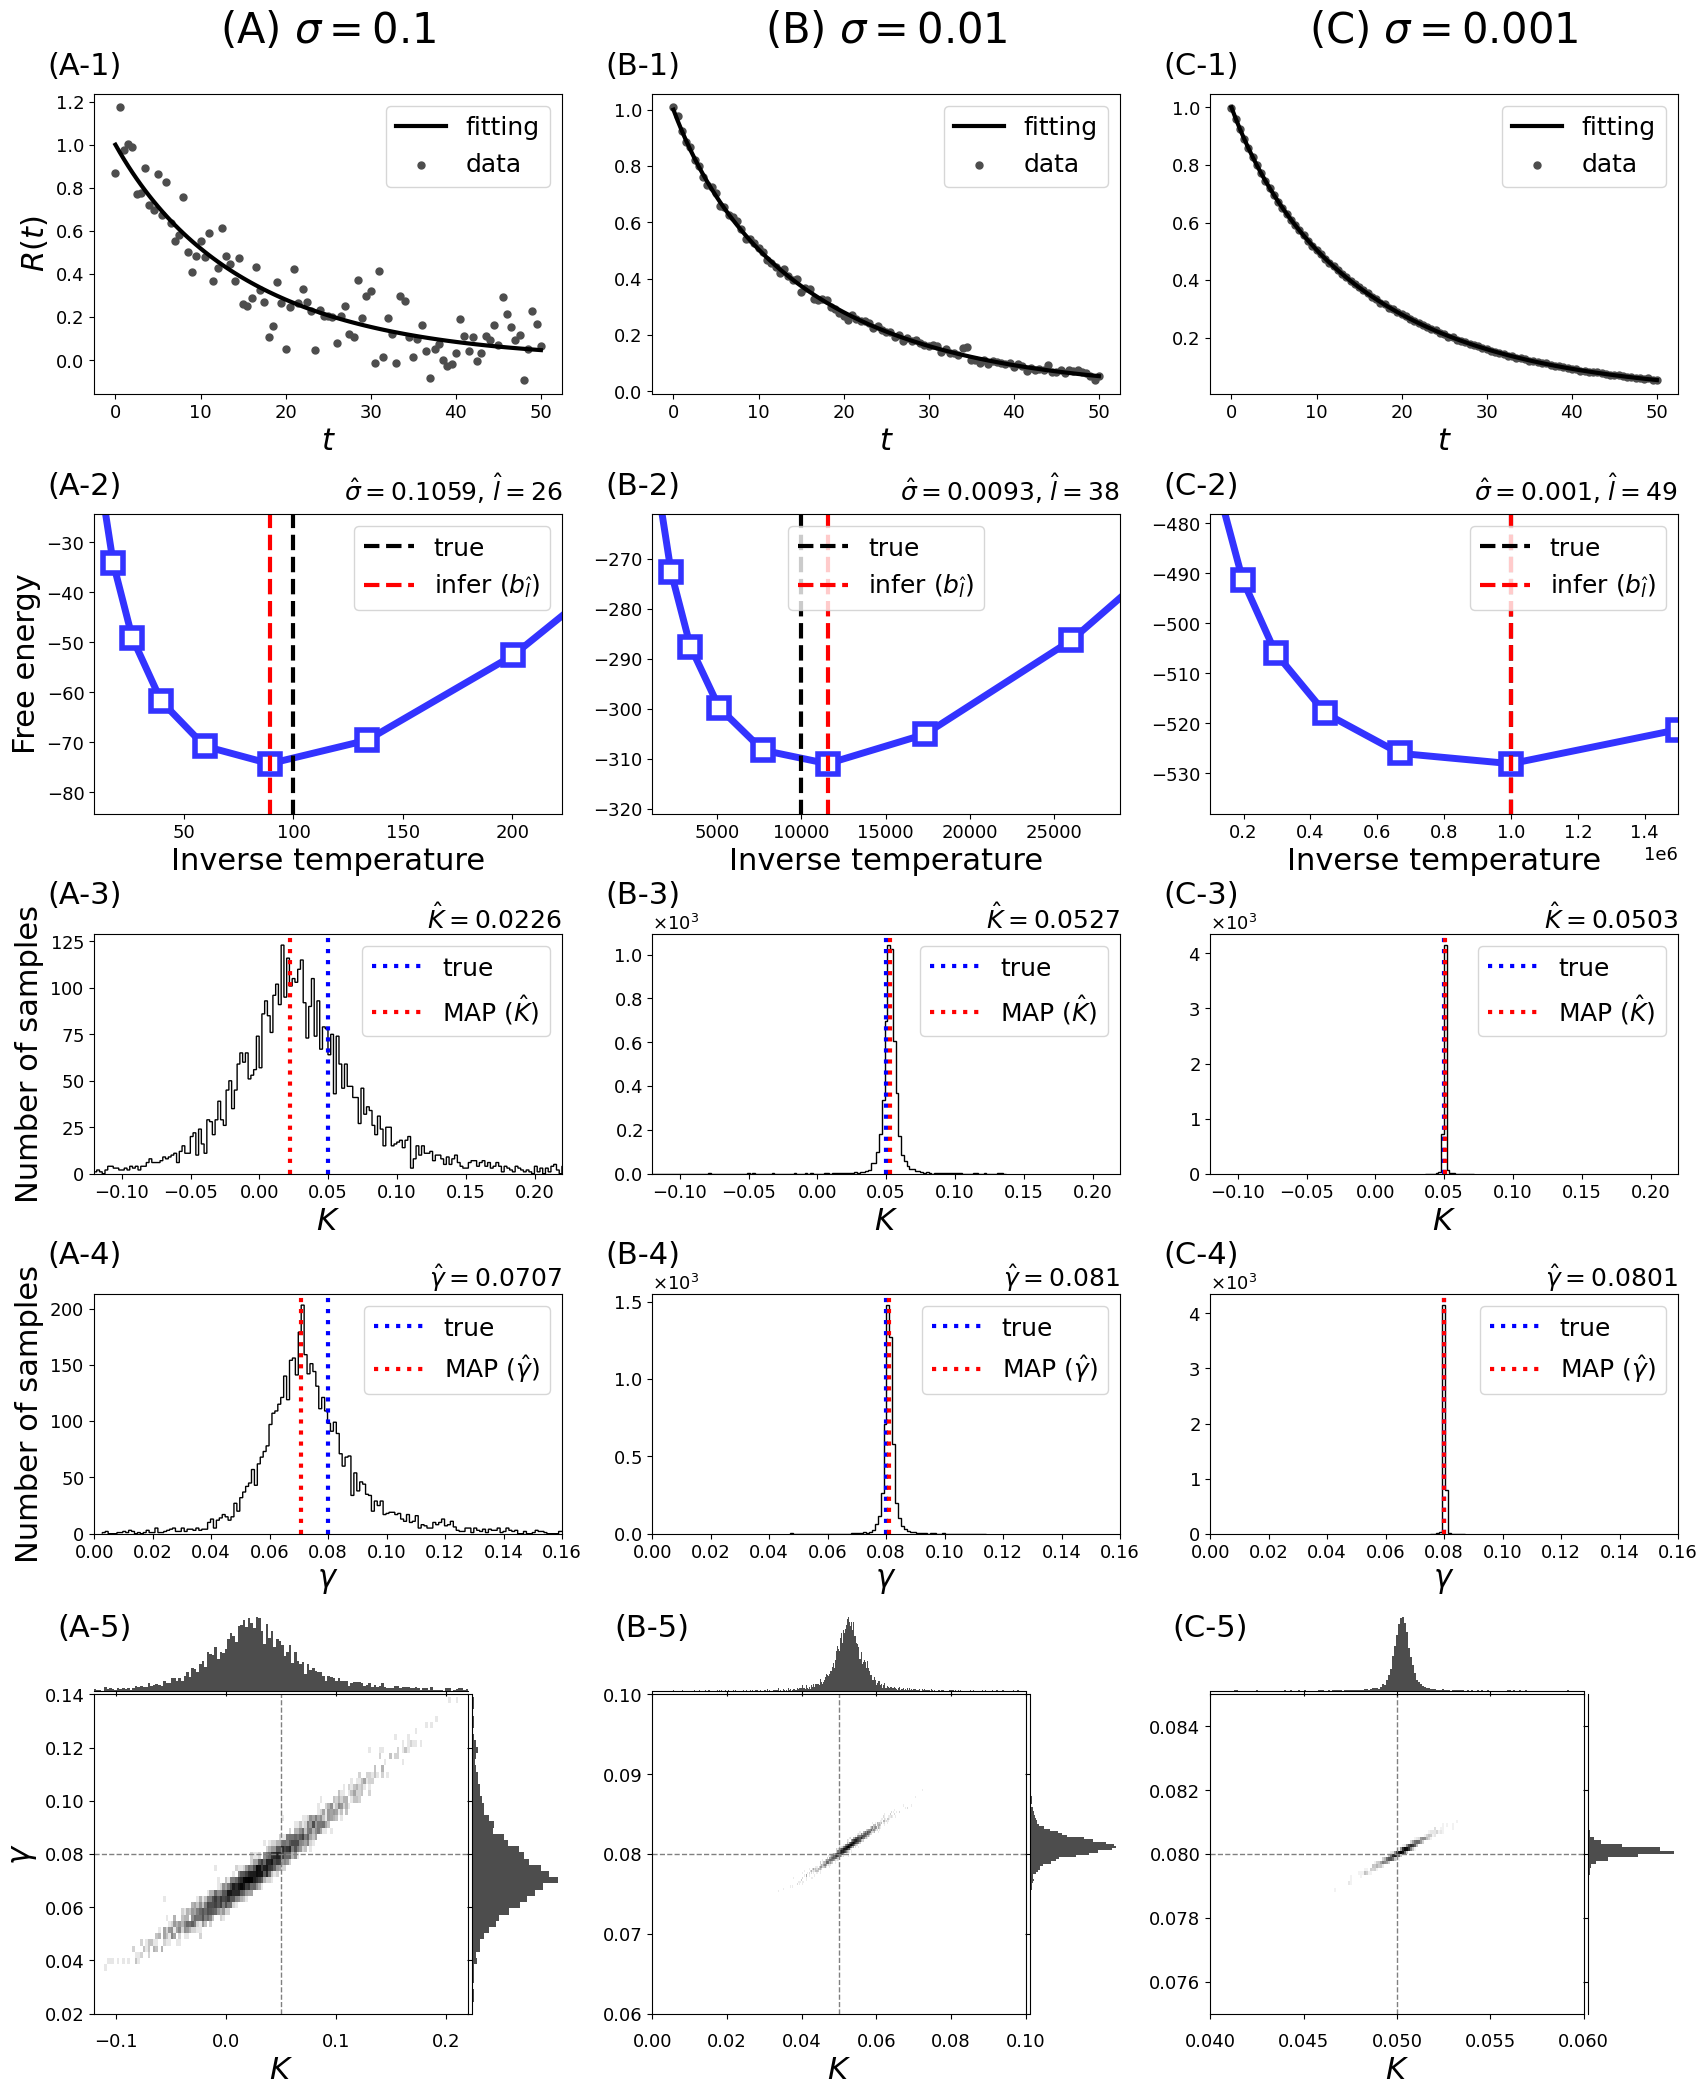

In [ ]:
### Figure for OA
mode = 'OA'

# xlim and ylim for 2d plot
xlim_list = [[-0.12, 0.22], [0.0, 0.1], [0.04, 0.06]]
ylim_list = [[0.02, 0.14], [0.06, 0.1], [0.075, 0.085]]

# file settings
file_list = ["./OA/OA_241225/output_files_01", "./OA/OA_241225/output_files_001", "./OA/OA_241225/output_files_0001"]
savefilename = "OA_single_241225.pdf"

# draw
draw_all(mode, xlim_list, ylim_list, file_list, savefilename)

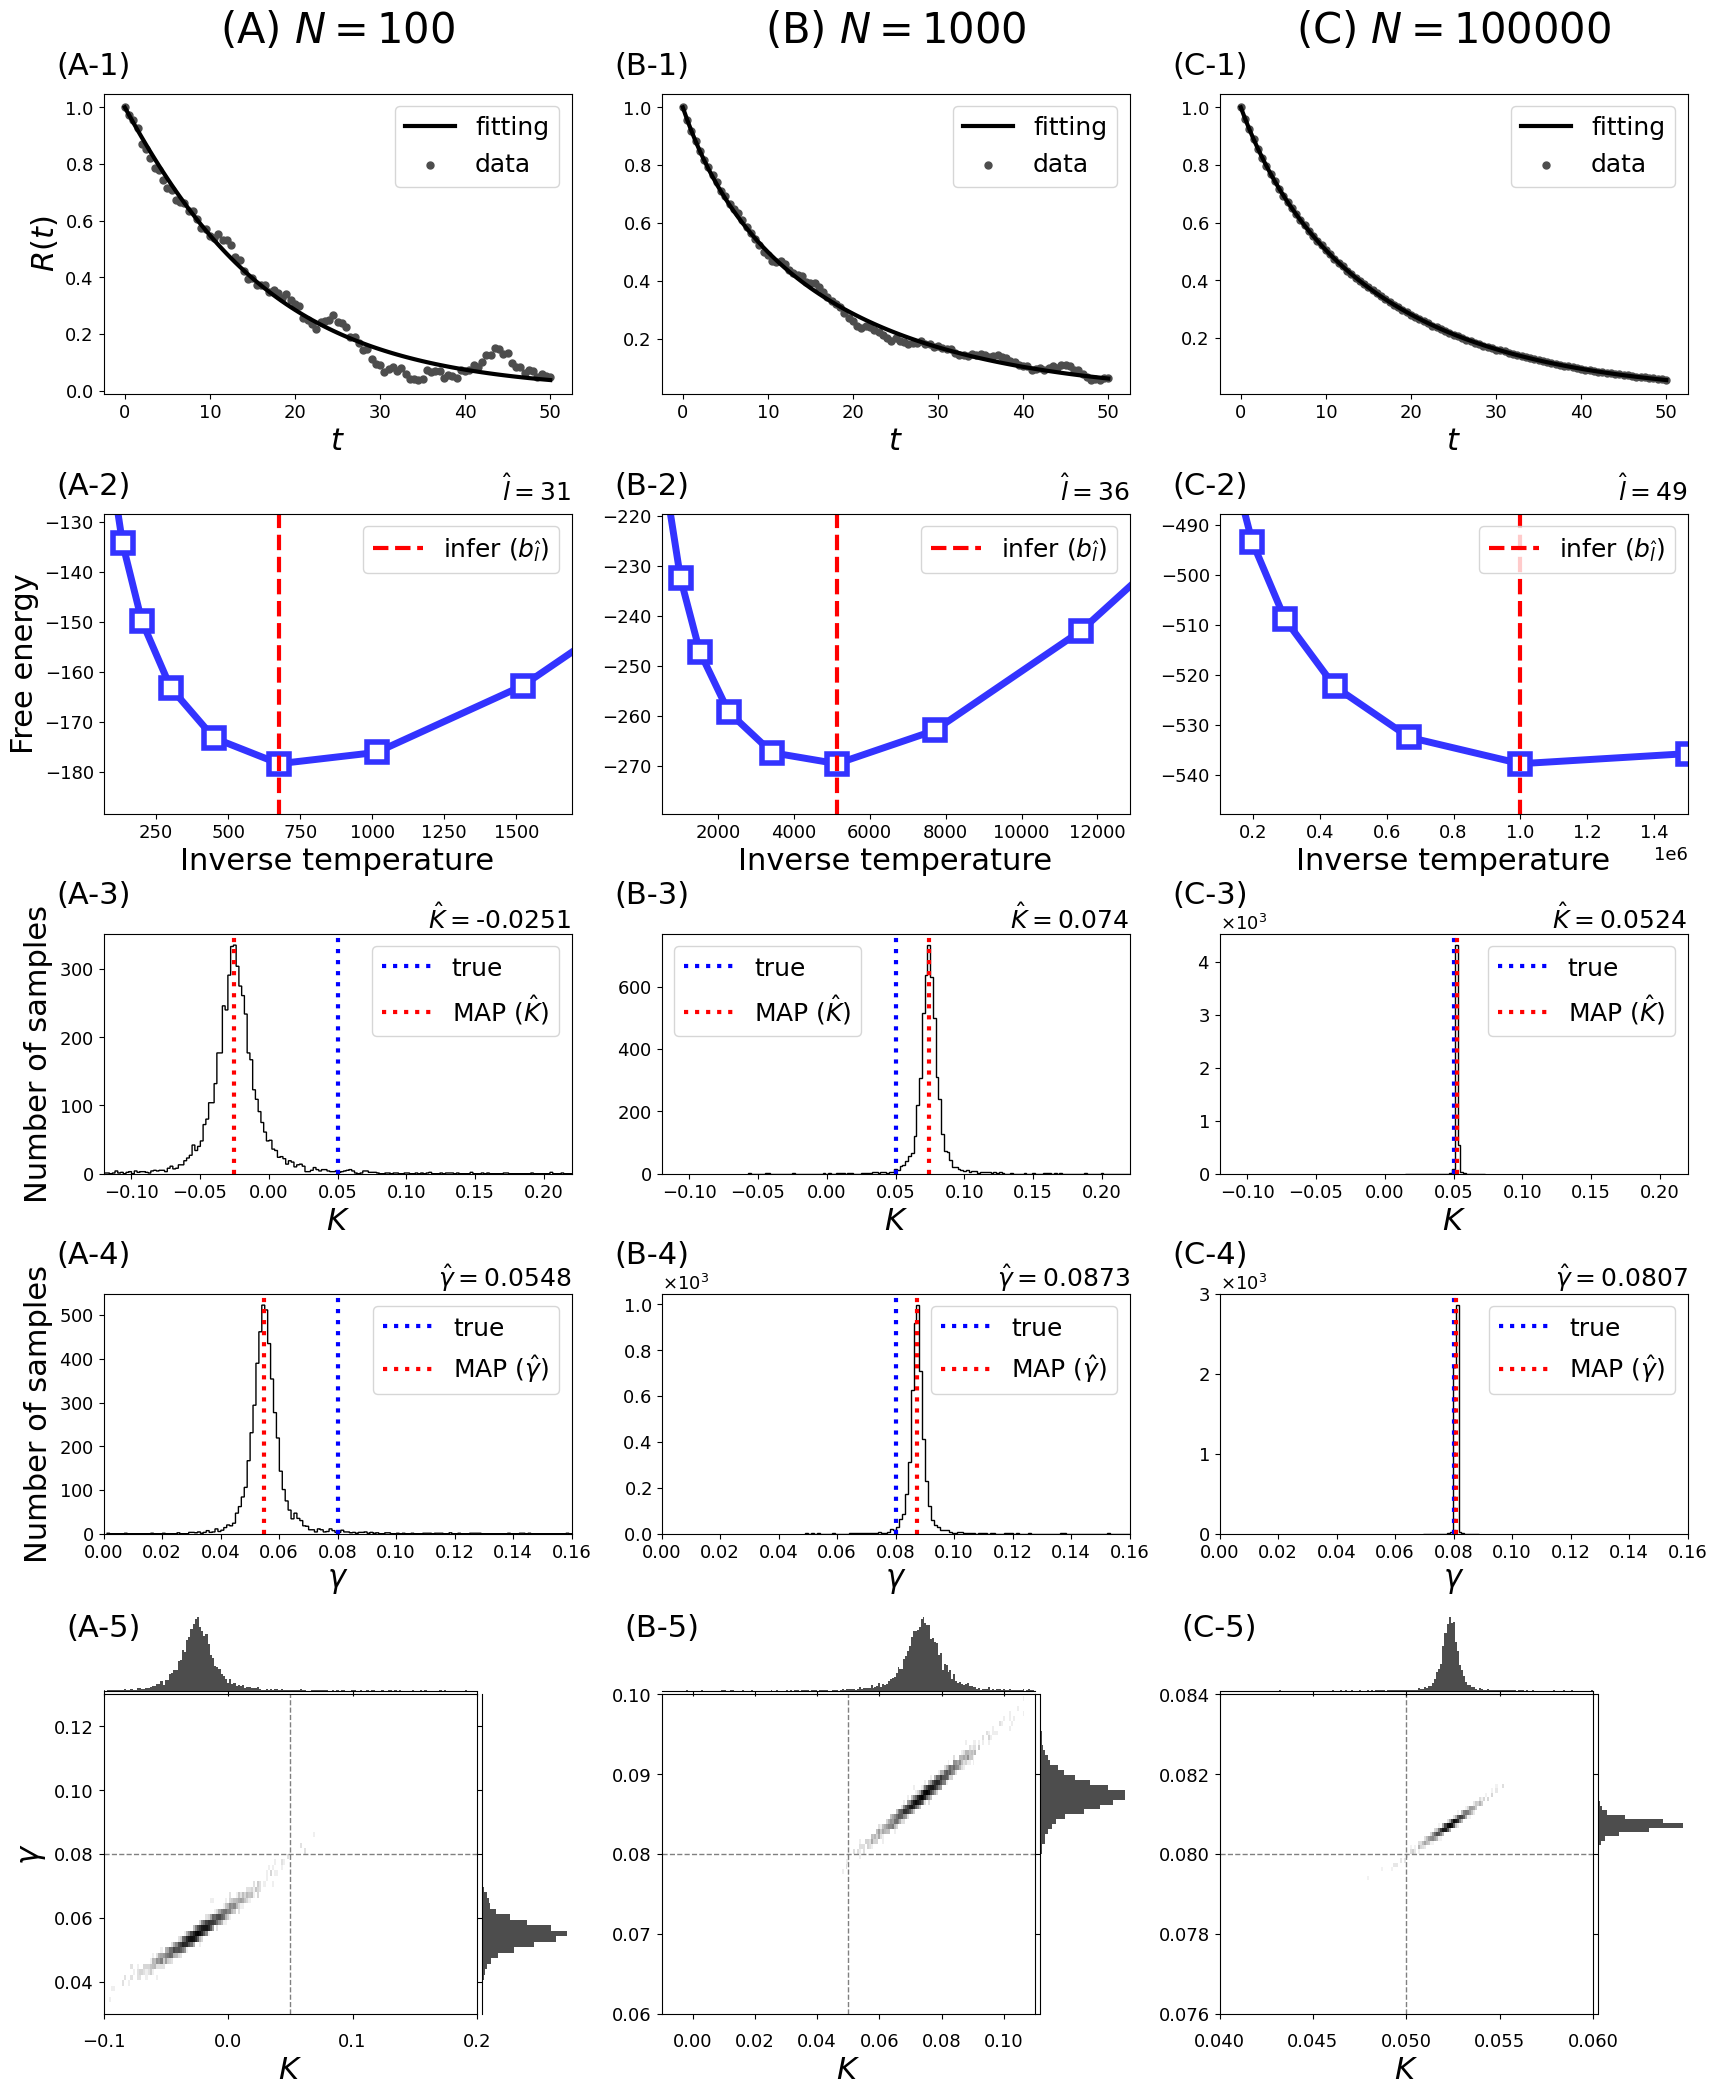

In [ ]:
### Figure for kuramoto
mode = 'kuramoto'

# xlim and ylim for 2d plot
xlim_list = [[-0.1, 0.2], [-0.01, 0.11], [0.04, 0.06]]
ylim_list = [[0.03, 0.13], [0.06, 0.1], [0.076, 0.084]]

# file settings
file_list = ["./kuramoto/kuramoto_241225/output_files_n100", "./kuramoto/kuramoto_241225/output_files_n1000", "./kuramoto/kuramoto_241225/output_files_n100000"]
savefilename = "kuramoto_single_241225.pdf"

# draw
draw_all(mode, xlim_list, ylim_list, file_list, savefilename)